In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Ex1

## 1.1 การใช้ IQR เพื่อหาค่าผิดปกติ

In [ ]:
data = pd.read_csv('outlier.csv')
data_backup = data.copy()
print(data)
print('--------------------------------------')
print(data.describe())

In [ ]:
q3 = data.Buy.quantile(.75)
q1 = data.Buy.quantile(.25)

In [ ]:
iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

## 1.2 การตรวจสอบค่าผิดปกติด้วย Boxplot

In [ ]:
plt.axvline(x=q1, c='b', linestyle='--', linewidth=1) #
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1) #
plt.axvline(x=lower, c='r', linestyle='--') #
plt.axvline(x=upper, c='r', linestyle='--') #
sns.boxplot(x=data.Buy, width=0.4, palette='Set2')
plt.show()

## 1.3 ขอบเขตบน และขอบเขตล่าง

In [ ]:
filter_upper = data.Buy > upper

In [ ]:
data[filter_upper].count()

In [ ]:
data[filter_upper]

In [ ]:
data.drop(data[filter_upper].index, inplace=True)
data

In [ ]:
filter_lower = data.Buy < lower
data[filter_lower]

In [ ]:
data.drop(data[filter_lower].index, inplace=True)
data

In [ ]:
q3 = data.Buy.quantile(.75)
q1 = data.Buy.quantile(.25)

iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

In [ ]:
plt.axvline(x=q1, c='b', linestyle='--', linewidth=1) #
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1) #
plt.axvline(x=lower, c='r', linestyle='--') #
plt.axvline(x=upper, c='r', linestyle='--') #
sns.boxplot(x=data.Buy, width=0.4, palette='Set2')
plt.show()

In [ ]:
filter_upper = data.Buy > upper
data.drop(data[filter_upper].index, inplace=True)
filter_lower = data.Buy < lower
data.drop(data[filter_lower].index, inplace=True)

In [ ]:
data

In [ ]:
q3 = data.Buy.quantile(.75)
q1 = data.Buy.quantile(.25)

iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

In [ ]:
plt.axvline(x=q1, c='b', linestyle='--', linewidth=1) #
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1) #
plt.axvline(x=lower, c='r', linestyle='--') #
plt.axvline(x=upper, c='r', linestyle='--') #
sns.boxplot(x=data.Buy, width=0.4, palette='Set2')
plt.show()

## 1.4 Z-score
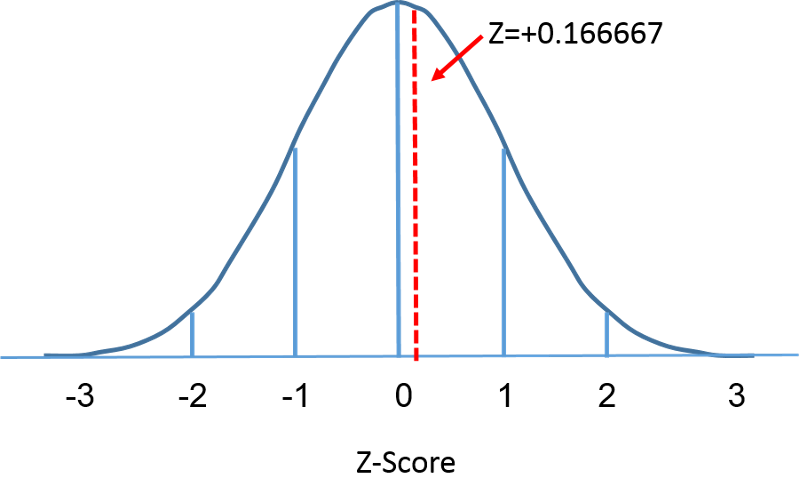

In [ ]:
data = pd.read_csv('outlier.csv')
data_backup = data.copy()

In [ ]:
data['buy_zscore'] = zscore(data.Buy, ddof=0)
data

In [ ]:
data.describe()

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=data.Buy, bins=20, ax=axes[0], color='b', kde=True, stat="density")
sns.histplot(x=data.buy_zscore, bins=20, ax=axes[1], color='b', kde=True, stat="density")
plt.show()

In [ ]:
diff = 2.5
data['buy_outlier'] = data.buy_zscore.apply(lambda x : (np.abs(x) >= diff) )

In [ ]:
data

In [ ]:
filter = np.abs(data.buy_zscore) <= diff
data = data[filter]

In [ ]:
data

# 2.ตัวอย่างการหาค่าผิดปกติด้วย IQR และ Boxplot

In [ ]:
data = pd.read_csv('weight-height.csv', encoding='unicode_escape')
data_backup = data.copy()
data

In [ ]:
data.describe()

## 2.1 ค้นหาขอบเขตบน และขอบเขตล่าง คอลัมน์ Height ครั้งที่ 1

In [ ]:
q3 = data.Height.quantile(.75)
q1 = data.Height.quantile(.25)
iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

In [ ]:
plt.axvline(x=q1, c='b', linestyle='--', linewidth=1) #
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1) #
plt.axvline(x=lower, c='r', linestyle='--') #
plt.axvline(x=upper, c='r', linestyle='--') #
sns.boxplot(x=data.Height, width=0.4, palette='Set2')
plt.show()

## 2.2 กำจัดข้อมูลที่เลยขอบเขตบน และล่าง คอลัมน์ Height ครั้งที่ 1

In [ ]:
filter_upper = data.Height > upper
data.drop(data[filter_upper].index, inplace=True)

filter_lower = data.Height < lower
data.drop(data[filter_lower].index, inplace=True)

## 2.3 ค้นหาขอบเขตบน และขอบเขตล่าง คอลัมน์ Height ครั้งที่ 2

In [ ]:
q3 = data.Height.quantile(.75)
q1 = data.Height.quantile(.25)
iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1) #
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1) #
plt.axvline(x=lower, c='r', linestyle='--') #
plt.axvline(x=upper, c='r', linestyle='--') #
sns.boxplot(x=data.Height, width=0.4, palette='Set2')
plt.show()

# 2.4 Quize: จงแสดงวิธีหาค่าผิดปกติของคอลัมน์ Weight จากไฟล์ weight-height.csv 

# 3.ตัวอย่างการหาค่าผิดปกติด้วย Z-score

In [ ]:
data = pd.read_csv('weight-height.csv', encoding='unicode_escape')
data_backup = data.copy()

In [ ]:
data['Height_zscore'] = zscore(data.Height, ddof=0)
f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=data.Height, bins=20, ax=axes[0], color='r', kde=True, stat="density")
sns.histplot(x=data.Height_zscore, bins=20, ax=axes[1], color='r', kde=True, stat="density")
plt.show()

diff = 2.5
filter = np.abs(data.Height_zscore) <= diff
data = data[filter]

f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=data.Height, bins=20, ax=axes[0], color='b', kde=True, stat="density")
sns.histplot(x=data.Height_zscore, bins=20, ax=axes[1], color='b', kde=True, stat="density")
plt.show()

In [ ]:
data['Weight_zscore'] = zscore(data.Weight, ddof=0)

f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=data.Weight, bins=20, ax=axes[0], color='g', kde=True, stat="density")
sns.histplot(x=data.Weight_zscore, bins=20, ax=axes[1], color='g', kde=True, stat="density")
plt.show()

diff = 2.5
filter = np.abs(data.Weight_zscore) <= diff
data = data[filter]

f, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=data.Weight, bins=20, ax=axes[0], color='y', kde=True, stat="density")
sns.histplot(x=data.Weight_zscore, bins=20, ax=axes[1], color='y', kde=True, stat="density")
plt.show()

# 4. ตัวอย่างการบันทึกไฟล์ CSV หรือ Excel ที่ถูกแก้ไขแล้ว

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = pd.read_csv('data_missing.csv')
'''
สมมุติว่าทำแก้ไขปัญหาต่างๆภายในไฟล์ครบทั้งหมดแล้ว
'''
data.to_csv('test.csv',index=False)
data.to_excel('test.xlsx',index=False)

# 5. Quiz: ตรวจสอบข้อมูลทุก Features แล้วทำ Data Cleaning ทั้งหมด

## 5.1 คำอธิบายข้อมูล
### card คือ สถานะการใช้งานบัตร
### reports คือ จำนวนครั้งที่ถูกรายงานว่าผิดนัด
### age คือ อายุของผู้ถือบัตร [แทนที่ค่าว่างด้วย Median]
### income คือ รายได้ของผู้ถือบัตร [แทนที่ค่าว่างด้วย Mean]
### share คือ ส่วนแบ่งค่านายหน้า [แทนที่ค่าว่างด้วย ค่าก่อนหน้า][ค่าไม่เกิน 1.0]
### expenditure คือ รายจ่ายของผู้ถือบัตร [แทนที่ค่าว่างด้วย ค่าถัดไป]
### owner คือ ผู้ถือบัตรเป็นเจ้าของกิจการหรือไม่
### selfemp คือ ผู้ถือบัตรประกอบอาชีพอิสระหรือไม่
### dependents คือ จำนวนผู้อยู่ในอุปการะ
### months คือ จำนวนเดือน  [แทนที่ค่าว่างด้วย รหัสนักศึกษา 2 ตัวท้าย][ค่าไม่เกิน 500]
### majorcards คือ ใช่ร่วมกับบัตรหลักหรือไม่
### active คือ ระยะเวลาที่ใช้งานล่าสุด [แทนที่ข้อมูลด้วย รหัสนักศึกษา 2 ตัวท้าย]

## 5.2 Export ออกมาเป็นไฟล์ csv หรือ xlsx ก็ได้โดยกำหนดชื่อเป็นรหัสนักศึกษา

In [ ]:
data = pd.read_csv('credit_card_data.csv', encoding='unicode_escape')
data_backup = data.copy()
print(data)
print()
print(data.describe())

In [ ]:
data.dtypes

In [ ]:
data.isnull().any()

In [ ]:
data.isnull().sum()

## age มีข้อมูลผิดชนิด, ข้อมูลหาย

In [ ]:
data['age'] = pd.to_numeric(data['age'], errors='coerce', downcast='integer')
data['age'] = data['age'].fillna(data['age'].median())
data['age']=data['age'].astype('int64')

## income ข้อมูลหาย

In [ ]:
data['income'] = data['income'].fillna(data['income'].mean())

## share มีข้อมูลผิดชนิด, ข้อมูลหาย

In [ ]:
data['share'] = pd.to_numeric(data['share'], errors='coerce', downcast='integer')
data['share'].fillna(method='pad', inplace=True)
data = data[data['share']<1.0]

## expenditure	มีข้อมูลผิดชนิด, ข้อมูลหาย

In [ ]:
data['expenditure'] = pd.to_numeric(data['expenditure'], errors='coerce', downcast='integer')
data['expenditure'].fillna(method='bfill', inplace=True)

## selfemp	รูปแบบข้อมูลเกิน

In [ ]:
data['selfemp'] = data['selfemp'].str.upper()
data['selfemp'].replace('Y', 'YES',inplace=True)
data['selfemp'].replace('N', 'NO',inplace=True)

## dependents	มีค่าติดลบ

In [ ]:
data = data[data['dependents']>0]

## months มีข้อมูลผิดชนิด

In [ ]:
data['months'] = pd.to_numeric(data['months'], errors='coerce', downcast='integer')
data['months'] = data['months'].fillna(999)

## active มีข้อมูลผิดชนิด และ ค่าติดลบ

In [ ]:
data['active'] = pd.to_numeric(data['active'], errors='coerce', downcast='integer')
data['active'] = data['active'].fillna(-999)
data = data[data['active']>0]

## บันทึกไฟล์หลังจากทำการ Cleaning

In [ ]:
data.to_csv('A2Lab5Q5_รหัสนักศึกษา.csv',index=False)

# 6. Quiz: ตรวจสอบค่าผิดปกติของทุกคอลัมน์

In [ ]:
data = pd.read_csv('A2Lab5Q5_รหัสนักศึกษา.csv')
data_backup = data.copy()
print(data)
print('--------------------------------------')
print(data.describe())

## IQR คอลัมน์ income

In [ ]:
q3 = data.income.quantile(.75)
q1 = data.income.quantile(.25)
iqr = q3 - q1

print('Q1: {}' . format(q1))
print('Q3: {}' . format(q3))
print('IQR: {}' . format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower: {:.2f} \nUpper: {:.2f}' . format(lower, upper))

## Boxplot คอลัมน์ income